In [1]:
%load_ext autoreload
%autoreload 2
!python --version

Python 3.7.3


In [2]:
from sen12ms.dataset import sen12ms
from sen12ms import models
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib

In [3]:
path = pathlib.PosixPath("/mnt/data")
#mean_optical = np.load(os.fspath(path/"total_optical_image.npy"))

In [4]:
dataset = sen12ms("/mnt/data", sar=True)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)

In [5]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    
    # Woodlands
    color_list[0] = [0.14509804, 0.34117647, 0.04705882,1]
    color_list[1] = [0.14509804, 0.34117647, 0.04705882,1]
    color_list[2] = [0.14509804, 0.34117647, 0.04705882,1]
    color_list[3] = [0.14509804, 0.34117647, 0.04705882,1]
    color_list[4] = [0.14509804, 0.34117647, 0.04705882,1]
    
    color_list[6] = [1,0.702,0,1] #shrub
    color_list[7] = [1,0.702,0,1] #shrub
    
    color_list[9] = [1., 0.97254902, 0.45098039, 1] #woody savannah
    color_list[8] = [0.10588235, 0.50980392, 0.14901961, 1] #savannah
    
    color_list[10] = [0.83137255, 1., 0.76078431,1]  #grassland
    color_list[11] = [0.55294118, 0.94117647, 0.8,1] #wetland
    
    color_list[12] = [0.54509804, 1, 0.52156863,1] # Cropland
    color_list[13] = [0.4,0.4,0.4,1] # Urban
    color_list[14] = [0.54509804, 1, 0.52156863,1] # Cropland
    
    color_list[15] = [0.6784,0.9137,1,1] # Ice
    color_list[16] = [0.3,0.19,0.0078,1] # Barren
    color_list[17] = [0,0.4156,0.7607,1] # Water
    
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [6]:
def plot_segmentation(inputs, labels, outputs, cmap="jet_r"):
    i=0

    plt.figure(figsize=(15,5))

    plt.subplot(131)
    plt.imshow(inputs[i].cpu().numpy()[[5,4,3]].transpose(1,2,0)*4096/3200)

    plt.subplot(132)
    plt.imshow(np.argmax(torch.softmax(outputs[i].cpu().detach(), dim=0), axis=0), vmin=0, vmax=17, cmap=cmap)

    plt.subplot(133)
    plt.title("MODIS 500m Landcover")
    plt.imshow(np.argmax(labels[i], axis=0), vmin=0, vmax=17, cmap=cmap)
    cb = plt.colorbar()
    cb.set_ticks(np.arange(17))
    plt.clim(-0.5, 17 - 0.5)
    cb.set_ticklabels([str(int(i)+1) for i in cb.get_ticks()])

    plt.tight_layout()

In [10]:
pwd

'/home/Josh/sen12ms/notebooks'

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

unet_model = torch.load("../unet_model_20.pt")
linear_model = torch.load("../model_final.pt")

In [122]:
inputs, labels = next(iter(dataloader))
discrete_cm = discrete_cmap(18, 'jet_r')

inputs = inputs.to(device)

unet_model.eval()
outputs_unet = unet_model(inputs)

linear_model.eval()
outputs_linear = linear_model(inputs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


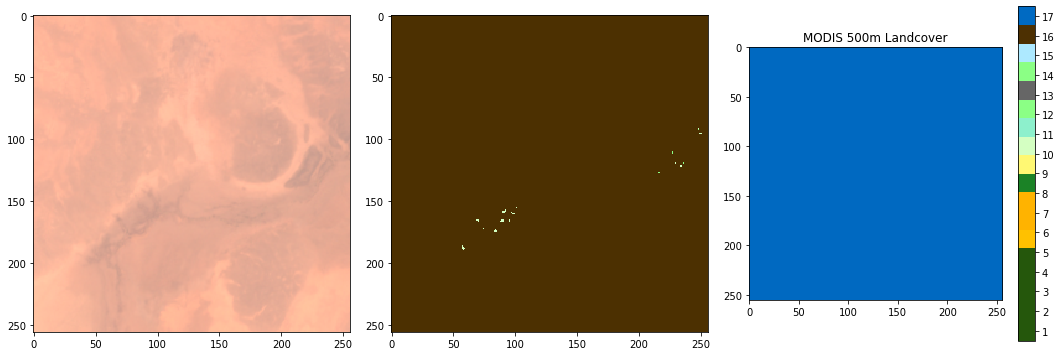

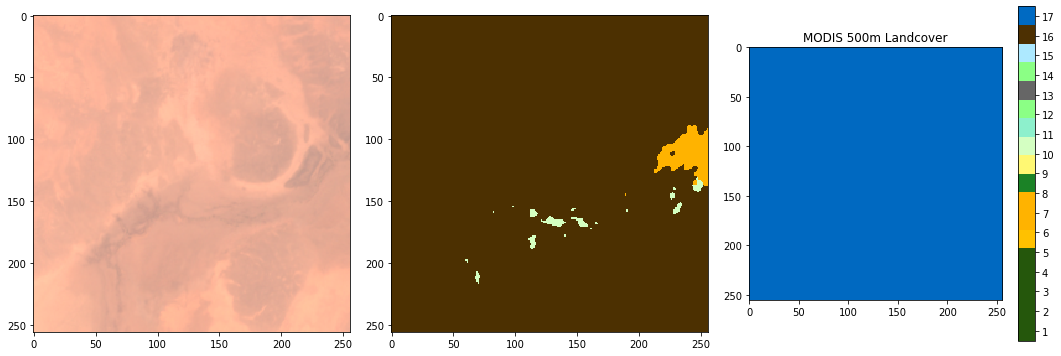

In [123]:
plot_segmentation(inputs, labels, outputs_linear, discrete_cm)

plot_segmentation(inputs, labels, outputs_unet, discrete_cm)

In [72]:
cd ..

/home/Josh/sen12ms


In [29]:
cp train_linear.py train_unet.py

In [27]:
curve = np.load("../unet_loss_curve.txt.npy", allow_pickle=True)

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [35]:
x = np.array(curve[0][0])

In [36]:
y = np.array(curve[0][1])

In [41]:
len(x)

45

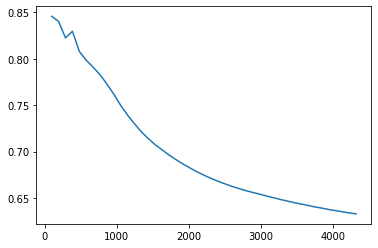

In [37]:
plot(x, y)

In [40]:
!tail -f ../nohup.out

Epoch 24/39
----------
LR 0.0001
train: bce: 0.084124, dice: 0.160647, loss: 0.122385
val: bce: 0.084886, dice: 0.160401, loss: 0.122643
saving best model
22m 53s
Epoch 25/39
----------
LR 0.0001
^C
